# Word Vector learning with Word2Vec

This notebook will help you get started with the skip-gram and CBOW model of word vector learning. Here we'll be using the `gensim` toolkit for python, which reimplements the code for training and evaluation of the models. Feel free to play with the orginal C code at https://code.google.com/archive/p/word2vec/ also.

The first step is to load the library into python. Note that you will need `gensim` and its dependent libraries as well as `nltk` installed in your environment. If you see an error importing these below, you'll need to `pip install` a few packages. 

In [1]:
import gensim, logging, os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

For the purpose of this we will use part of the Brown corpus. Note that for the word vectors to be meaningful you need much more text than this, e.g., all of Wikipedia or all of the English web (!), and train the model for many hours. 

In [2]:
import nltk
corpus = nltk.corpus.brown.sents() # make the corpus smaller if you want the code to run more quickly

This next line trains the model on the corpus, modelling all words that occur in the corpus. You can prune the vocabulary using the 'min_count' option, such that only words seen several times are included. This helps to make things faster and avoid modelling what might be typographical errors or other noise in the dataset.

In [4]:
fname = 'brown_skipgram.model'
if os.path.exists(fname):
    # load the file if it has already been trained, to save repeating the slow training step below
    model = gensim.models.Word2Vec.load(fname)
else:
    # can take a few minutes, grab a cuppa
    model = gensim.models.Word2Vec(corpus, size=100, min_count=5, workers=2, iter=50) 
    model.save(fname)

2017-03-28 12:15:49,461 : INFO : collecting all words and their counts
2017-03-28 12:15:49,473 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-03-28 12:15:50,102 : INFO : PROGRESS: at sentence #10000, processed 219770 words, keeping 23488 word types
2017-03-28 12:15:50,670 : INFO : PROGRESS: at sentence #20000, processed 430477 words, keeping 34367 word types
2017-03-28 12:15:51,372 : INFO : PROGRESS: at sentence #30000, processed 669056 words, keeping 42365 word types
2017-03-28 12:15:51,969 : INFO : PROGRESS: at sentence #40000, processed 888291 words, keeping 49136 word types
2017-03-28 12:15:52,425 : INFO : PROGRESS: at sentence #50000, processed 1039920 words, keeping 53024 word types
2017-03-28 12:15:52,790 : INFO : collected 56057 word types from a corpus of 1161192 raw words and 57340 sentences
2017-03-28 12:15:52,790 : INFO : Loading a fresh vocabulary
2017-03-28 12:15:52,854 : INFO : min_count=5 retains 15173 unique words (27% of original 56057

To see the various options for training the model, please read the help (see below, this will pop up a help window). For example the 'sg' option allows you to swap between the CBOW and skip-gram models. You can compare the results for running with both models by rerunning the training command above with this option. Consider 'size' also, which sets the number of hidden dimensions. There are a plethora of other parameters which can also have a big effect on the model quality and runtime.

In [5]:
gensim.models.Word2Vec?

## Evaluation

Now let's interrogate the model to see how similar various words are. Please try out some words yourself, to see whether its uncovered sensible or otherwise interesting relations. 

In [7]:
words = "woman women man girl boy green blue did".split()
for w1 in words:
    for w2 in words:
        print(w1, w2, model.similarity(w1, w2))

woman woman 1.0
woman women 0.3451595268
woman man 0.607956254336
woman girl 0.761190251497
woman boy 0.558522930154
woman green 0.24118403927
woman blue 0.178044251325
woman did 0.0751838683173
women woman 0.3451595268
women women 1.0
women man 0.126646555737
women girl 0.292825346454
women boy 0.298552943639
women green 0.104096393379
women blue 0.0930137564485
women did 0.152766770859
man woman 0.607956254336
man women 0.126646555737
man man 1.0
man girl 0.573867240925
man boy 0.556230783061
man green 0.0799302236673
man blue -0.00384949298866
man did 0.0327633852385
girl woman 0.761190251497
girl women 0.292825346454
girl man 0.573867240925
girl girl 1.0
girl boy 0.65453806002
girl green 0.206223652879
girl blue 0.198163041842
girl did 0.0131100043014
boy woman 0.558522930154
boy women 0.298552943639
boy man 0.556230783061
boy girl 0.65453806002
boy boy 1.0
boy green 0.190369484666
boy blue 0.229961614676
boy did -0.00520348028738
green woman 0.24118403927
green women 0.10409639337

It's a little easier to see if we plot this in a graph. Let's form a matrix with the words as rows and columns, and cells being the similarity values. We can then display this as if it were an image, and see clusters of items more clearly.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

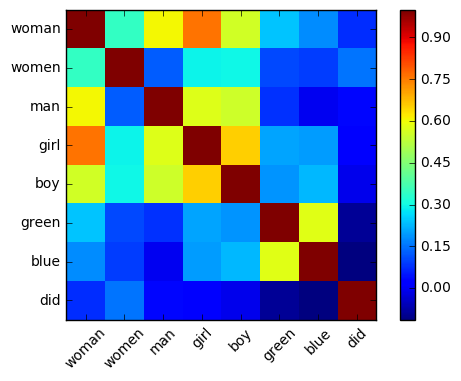

In [9]:
M = np.zeros((len(words), len(words)))
for i, w1 in enumerate(words):
    for j, w2 in enumerate(words):
        M[i,j] = model.similarity(w1, w2)
        
plt.imshow(M, interpolation='nearest')
plt.colorbar()

ax = plt.gca()
ax.set_xticklabels([''] + words, rotation=45)
ax.set_yticklabels([''] + words)

You can also find the 'k' most similar words to a given word. There's a lot of gibberish when trained on a small corpus. You should try increasing the size of the training data to see the difference.

In [10]:
model.most_similar(positive=['woman'], topn=10)

2017-03-28 12:23:49,652 : INFO : precomputing L2-norms of word weight vectors


[('girl', 0.7611901760101318),
 ('man', 0.6079562902450562),
 ('lady', 0.6069421768188477),
 ('boy', 0.5585228800773621),
 ('child', 0.5556907653808594),
 ('person', 0.5444432497024536),
 ('young', 0.5219132900238037),
 ('pair', 0.5211296081542969),
 ('she', 0.5175711512565613),
 ('fellow', 0.5115353465080261)]

Have more of a play with the 'most_similar' method, using the 'negative' option to perform vector difference in order to evaluate king-man+woman = ??? and similar.

In [ ]:
your code goes here...

## Quantitative evaluation

For more quantitative evaluation, download [this file](https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt) to the current working directory and see if your model gets many of these values correct. You will want to train on the full Brown corpus (or, better, a larger corpus) to give the model enough data to learn some of these relations.

In [13]:
# download the file (you can do this manually, of course!)
try: # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError: # Fall back to Python 2's urllib2
    from urllib2 import urlopen
uin = urlopen('https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt')
fout = open('questions-words.txt', 'w')
fout.write(uin.read().decode('utf-8'))

603955

In [14]:
# evaluate the model, warning - this can be slow
model.accuracy('questions-words.txt')

2017-03-28 12:25:52,792 : INFO : capital-common-countries: 5.6% (5/90)
2017-03-28 12:25:52,884 : INFO : capital-world: 0.0% (0/44)
2017-03-28 12:25:52,911 : INFO : currency: 0.0% (0/12)
2017-03-28 12:25:53,591 : INFO : city-in-state: 1.5% (7/457)
2017-03-28 12:25:53,931 : INFO : family: 30.5% (64/210)
2017-03-28 12:25:55,056 : INFO : gram1-adjective-to-adverb: 0.3% (2/756)
2017-03-28 12:25:55,252 : INFO : gram2-opposite: 0.8% (1/132)
2017-03-28 12:25:56,723 : INFO : gram3-comparative: 14.3% (151/1056)
2017-03-28 12:25:57,028 : INFO : gram4-superlative: 2.9% (6/210)
2017-03-28 12:25:57,956 : INFO : gram5-present-participle: 3.8% (25/650)
2017-03-28 12:25:58,390 : INFO : gram6-nationality-adjective: 0.7% (2/297)
2017-03-28 12:26:00,173 : INFO : gram7-past-tense: 8.5% (107/1260)
2017-03-28 12:26:00,981 : INFO : gram8-plural: 7.6% (42/552)
2017-03-28 12:26:01,465 : INFO : gram9-plural-verbs: 5.0% (17/342)
2017-03-28 12:26:01,466 : INFO : total: 7.1% (429/6068)


[{'correct': [('BERLIN', 'GERMANY', 'PARIS', 'FRANCE'),
   ('BERN', 'SWITZERLAND', 'ROME', 'ITALY'),
   ('CAIRO', 'EGYPT', 'PARIS', 'FRANCE'),
   ('CAIRO', 'EGYPT', 'ROME', 'ITALY'),
   ('CAIRO', 'EGYPT', 'BERLIN', 'GERMANY')],
  'incorrect': [('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'LONDON', 'ENGLAND'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BERLIN', 'GERMANY', 'BERN', 'SWITZERLAND'),
   ('BERLIN', 'GERMANY', 'CAIRO', 'EGYPT'),
   ('BERLIN', 'GERMANY', 'HAVANA', 'CUBA'),
   ('BERLIN', 'GERMANY', 'LONDON', 'ENGLAND'),
   ('BERLIN', 'GERMANY', 'MOSCOW', 'RUSSIA'),
   ('BERLIN', 'GERMANY', 'ROME', 'ITALY'),
   ('BERLIN', 'GERMANY', 'TOKYO', 'JAPAN'),
   ('BERLIN', 'GERMANY', 'ATHENS', 'GREECE

## Using 'big data' 

Finally let's use a model trained on masses of data. This is courtesy of Google Research who've trained a 300d model on terabytes of text, and provided the trained model files. NLTK includes a vocabulary restricted snippet which is fairly compact.

In [15]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
big_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

2017-03-28 12:26:18,021 : INFO : loading projection weights from /Users/tcohn/nltk_data/models/word2vec_sample/pruned.word2vec.txt
2017-03-28 12:26:27,963 : INFO : loaded (43981, 300) matrix from /Users/tcohn/nltk_data/models/word2vec_sample/pruned.word2vec.txt


How does it differs from the small model? Try some of the above tests to see whether the vectors to appear to better capture the characteristics of words. 

In [16]:
big_model.most_similar(positive=['woman'], topn=10)

2017-03-28 12:26:27,967 : INFO : precomputing L2-norms of word weight vectors


[('man', 0.7664012908935547),
 ('girl', 0.749464213848114),
 ('teenager', 0.6317085027694702),
 ('lady', 0.628878653049469),
 ('mother', 0.6076303720474243),
 ('boy', 0.5975909233093262),
 ('Woman', 0.5770983099937439),
 ('she', 0.5641393661499023),
 ('person', 0.5470172166824341),
 ('housewife', 0.5463820695877075)]

Try the quantative evaluation above for the big model. Does it perform better? Come up with some tests for different relation types, e.g., city-state, place-sport team, hyper-hyponym, tense, number, etc and see if the model can capture these well.

In [ ]:
your code goes here...

You can play with the [full set of Google vectors]( https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit), although be warned it's a rather big file and you need a machine with >10GiB of RAM to load it. 

Or you might want to train your own vectors on your own corpus. 